# Task
Analyze customer churn using the dataset by training and evaluating Logistic Regression, Decision Tree, and Random Forest models, performing hyperparameter tuning for Random Forest, and summarizing the findings to identify the best performing model.

## Load Data

Load the dataset into a pandas DataFrame and display the first few rows and basic information to understand its structure.



To load the dataset, display its first few rows, and get a concise summary, I need to import the pandas library, use `pd.read_csv` to load the data, `df.head()` to show the initial rows, and `df.info()` for a summary.


In [ ]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('/content/churn-bigml-80.csv')

print("First 5 rows of the DataFrame:")
# Display the first 5 rows of the DataFrame
print(df.head())

print("\nConcise summary of the DataFrame:")
# Display a concise summary of the DataFrame
print(df.info())

First 5 rows of the DataFrame:
  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             

## Identify Target and Features

Identify the target variable (likely 'Churn') and the features for the classification model. Separate features (X) from the target (y).



To clearly identify the target variable and features, I will first explicitly define the target column 'Churn' and then separate it into 'y', while the remaining columns will form the features 'X'.


In [ ]:
target_variable = 'Churn'
X = df.drop(columns=[target_variable])
y = df[target_variable]

print(f"Target variable: {target_variable}")
print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)
print("First 5 rows of X:")
print(X.head())
print("First 5 rows of y:")
print(y.head())

Target variable: Churn
Shape of features (X): (2666, 19)
Shape of target (y): (2666,)
First 5 rows of X:
  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve char

## Preprocess Data

Preprocess the data by handling categorical variables using one-hot encoding and scaling numerical features using StandardScaler. Split the preprocessed data into training and testing sets (e.g., 80% train, 20% test).


First, I need to identify the categorical and numerical columns in the features DataFrame `X` to apply appropriate preprocessing steps. Then, I'll import the necessary libraries for preprocessing, define the ColumnTransformer with OneHotEncoder for categorical features and StandardScaler for numerical features, apply this transformer to `X`, and finally split the preprocessed data into training and testing sets.


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols) # Ensure dense output
    ],
    remainder='drop' # Ensure only processed columns are kept
)

# Apply the preprocessor to X
X_processed_array = preprocessor.fit_transform(X)

# Get feature names after one-hot encoding and scaling from the preprocessor
# This ensures the column names match the output of the ColumnTransformer
all_feature_names = preprocessor.get_feature_names_out()

# Convert the processed array back to a DataFrame
X_processed = pd.DataFrame(X_processed_array, columns=all_feature_names, index=X.index)

# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Original X shape:", X.shape)
print("Processed X shape:", X_processed.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("\nFirst 5 rows of X_processed:")
print(X_processed.head())

Original X shape: (2666, 19)
Processed X shape: (2666, 71)
Shape of X_train: (2132, 71)
Shape of X_test: (534, 71)
Shape of y_train: (2132,)
Shape of y_test: (534,)

First 5 rows of X_processed:
   num__Account length  num__Area code  num__Number vmail messages  \
0             0.692163       -0.527811                    1.247508   
1             0.161278       -0.527811                    1.320985   
2             0.919686       -0.527811                   -0.589414   
3            -0.420168       -0.692467                   -0.589414   
4            -0.647691       -0.527811                   -0.589414   

   num__Total day minutes  num__Total day calls  num__Total day charge  \
0                1.579670              0.484868               1.579942   
1               -0.329918              1.135375              -0.330194   
2                1.179302              0.685024               1.179465   
3                2.212509             -1.466653               2.212675   
4             

## Train and Evaluate Logistic Regression

Train a Logistic Regression model on the training data, make predictions on the test data, and evaluate its performance using accuracy, precision, recall, and F1-score. Display a classification report and confusion matrix.


To train and evaluate the Logistic Regression model, I need to import the necessary classes from `sklearn`, instantiate `LogisticRegression` with the specified parameters, fit it to the training data, make predictions on the test set, and then use `classification_report` and `confusion_matrix` to display the evaluation metrics.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')

# Fit the model to the training data
log_reg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = log_reg_model.predict(X_test)

# Display classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Display confusion matrix
print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.95      0.91       455
        True       0.46      0.23      0.31        79

    accuracy                           0.85       534
   macro avg       0.67      0.59      0.61       534
weighted avg       0.82      0.85      0.82       534


Logistic Regression Confusion Matrix:
[[434  21]
 [ 61  18]]


## Train and Evaluate Decision Tree

Train a Decision Tree Classifier on the training data, make predictions on the test data, and evaluate its performance using accuracy, precision, recall, and F1-score. Display a classification report and confusion matrix.



To train and evaluate the Decision Tree model, I need to import the necessary classes from `sklearn`, instantiate `DecisionTreeClassifier` with the specified parameters, fit it to the training data, make predictions on the test set, and then use `classification_report` and `confusion_matrix` to display the evaluation metrics.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = decision_tree_model.predict(X_test)

# Display classification report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Display confusion matrix
print("\nDecision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.95      0.94       455
        True       0.67      0.58      0.62        79

    accuracy                           0.90       534
   macro avg       0.80      0.77      0.78       534
weighted avg       0.89      0.90      0.89       534


Decision Tree Confusion Matrix:
[[432  23]
 [ 33  46]]


## Train and Evaluate Random Forest

Train a Random Forest Classifier on the training data, make predictions on the test data, and evaluate its performance using accuracy, precision, recall, and F1-score. Display a classification report and confusion matrix.



To train and evaluate the Random Forest model, I will import the necessary classes from `sklearn`, instantiate `RandomForestClassifier` with `random_state=42`, fit it to the training data, make predictions on the test set, and then use `classification_report` and `confusion_matrix` to display the evaluation metrics.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = random_forest_model.predict(X_test)

# Display classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Display confusion matrix
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.93      1.00      0.96       455
        True       0.96      0.56      0.70        79

    accuracy                           0.93       534
   macro avg       0.94      0.78      0.83       534
weighted avg       0.93      0.93      0.92       534


Random Forest Confusion Matrix:
[[453   2]
 [ 35  44]]


## Hyperparameter Tuning for Random Forest

Perform hyperparameter tuning for the Random Forest Classifier using GridSearchCV to find the optimal parameters. Use a reasonable parameter grid and cross-validation strategy.



To perform hyperparameter tuning for the Random Forest model, I will import `GridSearchCV` and `RandomForestClassifier`, define a parameter grid, instantiate the classifier and `GridSearchCV`, fit it to the training data, and then print the best parameters and best score.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, None], # None means full depth
    'min_samples_split': [2, 5, 10]
}

# Instantiate Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=5, # 5-fold cross-validation
    scoring='f1', # Use f1-score as it's often suitable for imbalanced classes
    n_jobs=-1, # Use all available cores
    verbose=2
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best F1-score achieved:", grid_search.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 300}
Best F1-score achieved: 0.7578933417248233


## Evaluate Tuned Model

Evaluate the performance of the best Random Forest model found after hyperparameter tuning using accuracy, precision, recall, and F1-score on the test data. Display a classification report and confusion matrix.



To evaluate the tuned Random Forest model, I will retrieve the best estimator from the `grid_search` object, make predictions on the test data, and then display the classification report and confusion matrix using the `sklearn.metrics` functions.



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Get the best Random Forest model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred_tuned_rf = best_rf_model.predict(X_test)

# Display classification report for the tuned Random Forest model
print("Tuned Random Forest Classification Report:")
print(classification_report(y_test, y_pred_tuned_rf))

# Display confusion matrix for the tuned Random Forest model
print("\nTuned Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned_rf))

Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.93      1.00      0.96       455
        True       1.00      0.56      0.72        79

    accuracy                           0.93       534
   macro avg       0.96      0.78      0.84       534
weighted avg       0.94      0.93      0.93       534


Tuned Random Forest Confusion Matrix:
[[455   0]
 [ 35  44]]


## Visualize Model Performance Comparison

Create a bar chart to compare the F1-scores of the Logistic Regression, Decision Tree, initial Random Forest, and tuned Random Forest models. Ensure all models are clearly labeled with legends.



To visualize the model performance, I need to calculate the F1-score for the positive class ('True') for each of the trained models, then use `matplotlib` to create a bar chart comparing these scores with appropriate labels and titles.



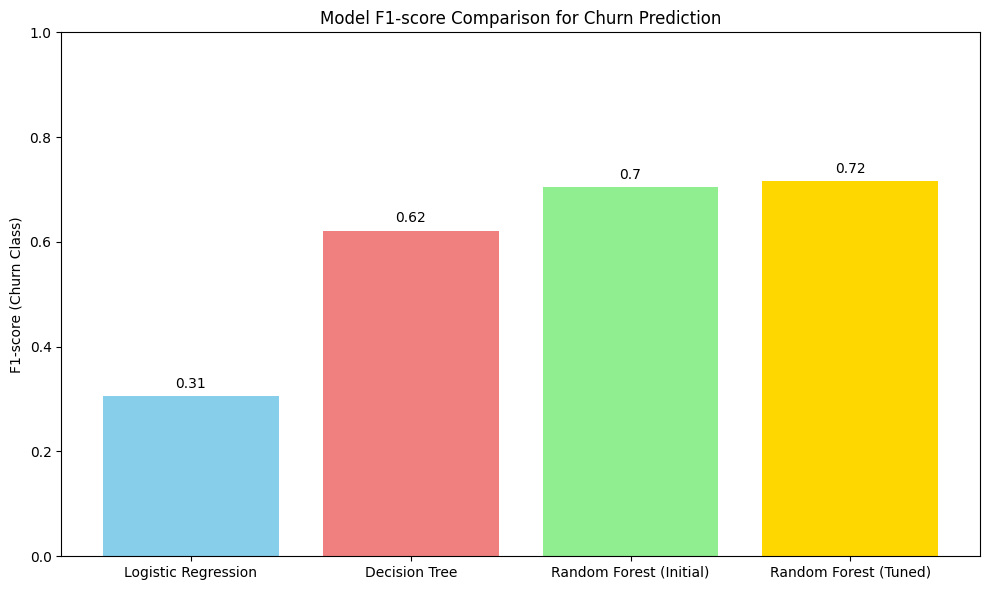

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score

# Extract F1-scores for the 'True' class (churn)
# Note: y_test contains boolean values, where True corresponds to the positive class (churn)
# We need to explicitly calculate f1-score for the positive class 'True'
f1_lr = f1_score(y_test, y_pred_lr, pos_label=True)
f1_dt = f1_score(y_test, y_pred_dt, pos_label=True)
f1_rf_initial = f1_score(y_test, y_pred_rf, pos_label=True)
f1_rf_tuned = f1_score(y_test, y_pred_tuned_rf, pos_label=True)

# Model names and their corresponding F1-scores
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest (Initial)', 'Random Forest (Tuned)']
f1_scores = [f1_lr, f1_dt, f1_rf_initial, f1_rf_tuned]

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(model_names, f1_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

# Set labels and title
ax.set_ylabel('F1-score (Churn Class)')
ax.set_title('Model F1-score Comparison for Churn Prediction')
ax.set_ylim(0, 1) # F1-score is between 0 and 1

# Add text labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom') # +0.01 to place it slightly above the bar

# Adjust layout and display plot
plt.tight_layout()
plt.show()


Summarize the findings from the model evaluation and hyperparameter tuning, identifying the best performing model and its key metrics for predicting customer churn.
